In [1]:
library(forecast)

In [3]:
dataset = read.csv("../../dengueData/SanJuan/san_juan_training_data.csv")
dataset

season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,additional_cases,total_cases
1990/1991,1,1990-04-30,0,0,0,0,4,0,4
1990/1991,2,1990-05-07,0,0,0,0,5,0,5
1990/1991,3,1990-05-14,0,0,0,0,4,0,4
1990/1991,4,1990-05-21,0,0,0,0,3,0,3
1990/1991,5,1990-05-28,0,0,0,0,6,0,6
1990/1991,6,1990-06-04,1,0,0,0,1,0,2
1990/1991,7,1990-06-11,0,0,0,0,4,0,4
1990/1991,8,1990-06-18,0,0,0,0,5,0,5
1990/1991,9,1990-06-25,2,0,0,0,8,0,10
1990/1991,10,1990-07-02,0,0,0,1,5,0,6


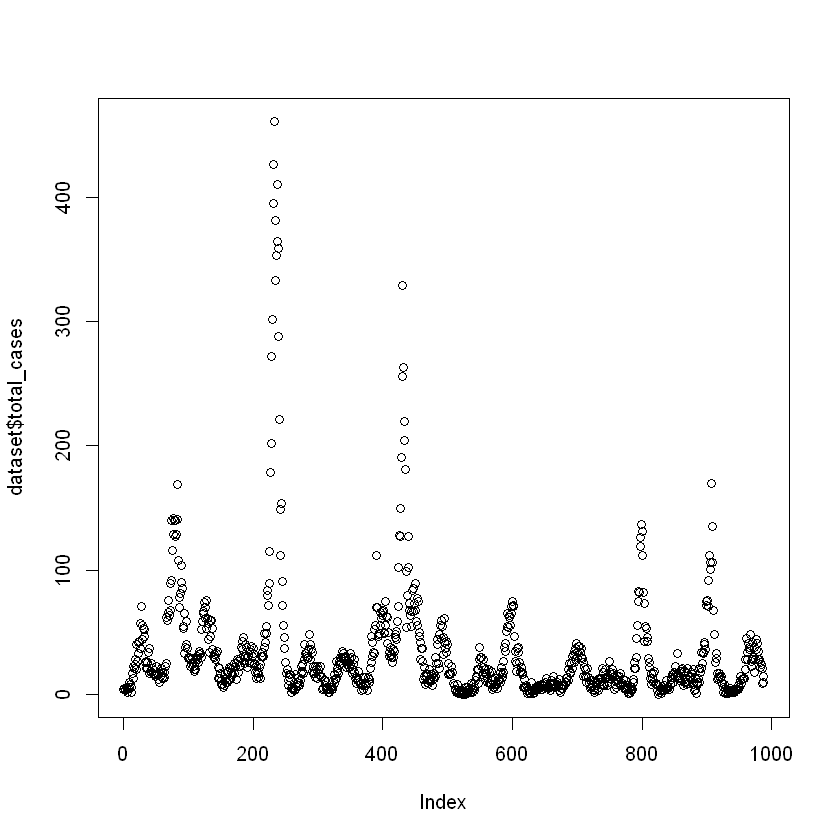

In [5]:
plot(dataset$total_cases)

In [8]:
window_size = 4
split_index = floor(0.7 * nrow(dataset))
lag_weeks = 2
train = dataset$total_cases[1:(split_index+window_size)]
test = dataset$total_cases[(split_index+window_size+lag_weeks):(nrow(dataset))]

length(train)
length(test)

[1] 695

[1] 292

In [10]:
fit <- auto.arima(dataset$total_cases[1:split_index])
fcast <- forecast(fit, h=2)

In [15]:
endIndex = length(test)
trainIndex = length(train)

predictions = numeric(0)
for (index in 1:endIndex){
# for(index in 1:10) {
    fit <- auto.arima(dataset$total_cases[1:trainIndex+index-1])
    fcast <- forecast(fit, h=2)
    forecasted_data <- data.frame(fcast)
    predictions[index] <- forecasted_data$Point.Forecast[2]
}

In [16]:
length(predictions)

predictions

[1] 292

[1]  23.7085463  37.9004881  26.1019325  39.2448021  42.7299967  31.2457317
  [7]  28.9371363  41.3671026  38.8366366  38.7462364  32.8222560  28.9726357
 [13]  39.0832653  27.2090147  24.8240945  11.8413877  23.6996918  13.7479586
 [19]  20.8230448  13.1176287   8.4968182  24.5464914  11.9567631  13.7870356
 [25]   8.8797621  11.3720899   3.8711566   6.0010699   7.6321590  11.5697283
 [31]   2.4084451   3.4828737   2.1710827   6.6847947  11.1487952   5.8234221
 [37]   4.7637468   2.3185864  14.3238981  12.9916520   8.9723585  13.6075536
 [43]  13.0440209   6.7294112  24.5096737  16.8686018   5.2153588   7.6021034
 [49]  23.0719507  10.9342261  13.9009762   5.7397046  15.5208934   9.2685387
 [55]  13.2896464  31.0548453   8.4797330  19.7827259  15.7928186  15.3914785
 [61]  21.6335900  15.6647990  -0.9146965  18.1231297   6.2812230   4.8077242
 [67]  14.1736836  15.5107939  10.1542545   9.4678653  16.6250882  17.1004015
 [73]   4.1960616   7.2703239   8.5406750   9.1747830  14.8476855  12.0000000
 [79]   2.4144155   4.3796440  12.7183995   2.2979536   4.9803695   7.6393655
 [85]  -0.5508450   1.0000000   4.9698534   1.5895738   7.0424967   3.5955565
 [91]   4.1552141  12.1001642  11.3736952  24.3259271  27.8889865  18.8453086
 [97]  32.4482045  49.0905149  59.0125203  80.2426395  85.2136045  81.7235346
[103] 139.8276567 118.2024311 140.7181027 130.2135670 106.5429130  72.0143589
[109]  69.9172566  34.0566661  57.9119828  56.5842437  51.7153728  43.6522055
[115]  41.3134726  24.6542258  19.3037434  27.5963254  12.2345172  16.6930014
[121]   5.5643944  13.9287571   9.6935021  18.7214992  20.1912810   5.9554016
[127]   8.8059664   9.5773343   1.0057998   7.7921460   7.1849078  -2.2107825
[133]   1.8244963   3.7234875   3.0825663   0.3644148   3.3797745   3.1527553
[139]   3.0612837   8.2493369   2.2728294   5.3229160  12.9669479   3.6000804
[145]   4.5780684   6.1316239   6.0545636   3.4107121   3.7564516   9.1241830
[151]  16.2945108  12.3262270  17.3559496   8.7295123  17.3013689  19.1487774
[157]  14.5562263  25.2580836  15.7884859  37.4891318  10.1641344  10.8794145
[163]  12.1199457  14.1798154  18.0361287  20.0361190  20.7367568   9.8863345
[169]  22.8476297   3.3877372  21.5188178   8.2932780  12.5497336   9.1532645
[175]   7.0359468  24.4938721   8.5039128   7.7572940  15.3859524  14.4167828
[181]  15.4805255  19.0324631  15.8798840  10.4826151  21.8504326   4.3092699
[187]   0.7382664  17.3010086   2.0861490  -0.7344727  13.1858980   8.2489409
[193]  14.6098993   9.7986039  24.2207445  18.5027467  21.6714170  38.4155494
[199]  23.3609763  36.3770303  33.7557619  42.4371653  43.6823760  34.9367289
[205]  82.7358070  79.3166504  76.5912378  97.1063064  66.0006126 122.4049543
[211] 109.3950059  98.8817214 189.3418690 136.2231995  99.0887987  54.5559955
[217]  38.5852709  42.1974605  17.8156970  32.5387788  23.5039923  12.4241572
[223]   8.5403828   9.9896381  17.0785877  21.8607705  13.3076362   6.2691324
[229]   1.3635628   3.9348128   1.1112387   4.7257152  10.0836490   5.2084966
[235]  -1.0730932   1.6086444   3.0745025   3.3692064   3.4940500   0.6659494
[241]   2.7528667   8.7033402   5.8835428   6.7712495   5.6593531   6.8086220
[247]   4.9572151   5.0420445   5.9539955   6.8540318   5.7245930   6.7637291
[253]   6.7767437   6.5688602   9.1807886   8.2682249  16.4046670  13.5777452
[259]  10.9107184   9.0000000  12.0000000  13.0000000  13.0000000  13.0000000
[265]  20.1550378  27.9894669  45.0000000  28.0000000  34.0000000  41.0000000
[271]  36.0000000  38.0000000  48.0000000  27.0000000  23.0000000  28.0000000
[277]  42.0000000  30.0000000  18.0000000  38.0000000  28.0000000  36.0000000
[283]  44.0000000  41.0000000  34.8716738  28.0000000  27.9864196  21.9317839
[289]  26.1111573  23.8749331   8.8935902  21.2515902

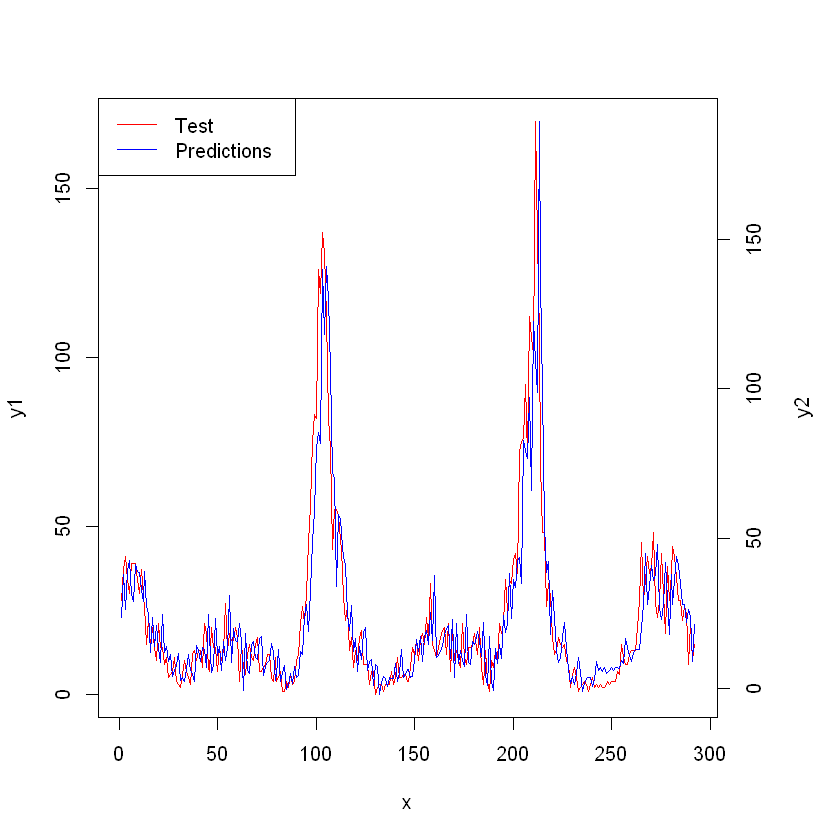

In [17]:

x <- 1:endIndex
y1 <- test
y2 <- predictions
par(mar=c(5,4,4,5)+.1)
plot(x,y1,type="l",col="red")
par(new=TRUE)
plot(x, y2,,type="l",col="blue",xaxt="n",yaxt="n",xlab="",ylab="")
axis(4)
mtext("y2",side=4,line=3)
legend("topleft",col=c("red","blue"),lty=1,legend=c("Test","Predictions"))

In [18]:
library(MLmetrics)
mse = MSE(predictions, test)
mse

[1] 175.981

In [10]:
df <- data.frame(test, predictions)